In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
mnist = keras.datasets.mnist ## load data base

In [3]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()    

In [4]:
test_features.shape

(10000, 28, 28)

In [5]:
train_features.shape

(60000, 28, 28)

7


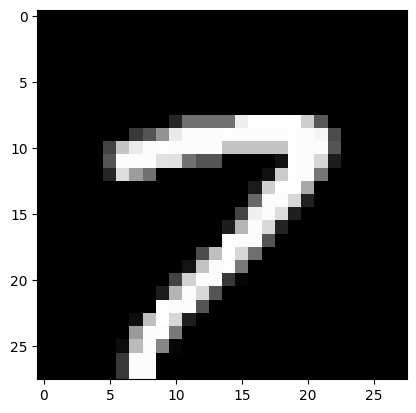

In [6]:
## show 123 pictur from data base
idx = 123

img = train_features[idx]
print(train_labels[idx])
plt.gray()
plt.imshow(img)

## Preprocessing

In [7]:
np.min(img),np.max(img)

train_features = train_features / 255.0
test_features = test_features / 255.0

## Model definition

In [8]:

model = keras.Sequential()
model.add(keras.layers.Flatten())  # Flatten matrix to array
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))  # Softmax for classification

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [10]:
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_features.shape , train_labels.shape

((60000, 28, 28), (60000,))

In [12]:
hist = model.fit(train_features, train_labels, epochs=20, batch_size=256, validation_data=(test_features, test_labels))  

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8039 - loss: 0.7343 - val_accuracy: 0.9470 - val_loss: 0.1804
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9518 - loss: 0.1657 - val_accuracy: 0.9599 - val_loss: 0.1339
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1139 - val_accuracy: 0.9680 - val_loss: 0.1024
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.0839 - val_accuracy: 0.9720 - val_loss: 0.0917
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9803 - loss: 0.0659 - val_accuracy: 0.9732 - val_loss: 0.0842
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9854 - loss: 0.0520 - val_accuracy: 0.9694 - val_loss: 0.0997
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9860 - loss: 0.0480 - val_accuracy: 0.9780 - val_loss: 0.0689
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9895 - loss: 0.0358 - val_accuracy: 0.

In [13]:
model.evaluate(test_features,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.9725 - loss: 0.1118


[0.09371361881494522, 0.9768999814987183]

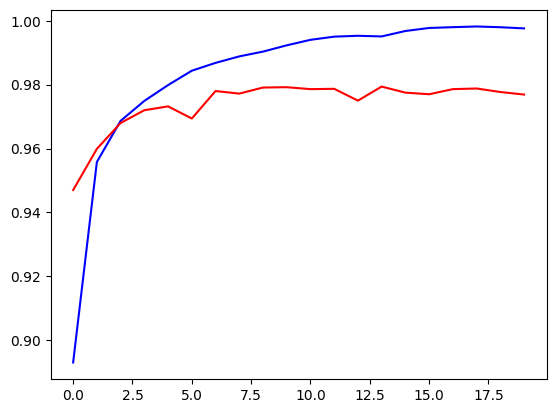

In [14]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(acc,color = 'blue')
plt.plot(val_acc,color = 'red')